In [500]:
# pandas: handle the datasets in the pandas dataframe for data processing and analysis
import pandas as pd
print("pandas version: {}". format(pd.__version__))

pandas version: 1.5.3


In [501]:
# matplotlib: standard library to create visualizations
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

matplotlib version: 3.5.2


In [502]:
# turn off warnings for better reading in the Jupyter notebbok
pd.options.mode.chained_assignment = None  # default='warn'

In [503]:
# load dataset
df_data1 = pd.read_csv('datasæt del1 komma.csv')
df_data2 = pd.read_csv('datasæt del2 komma.csv')

In [504]:
# print the last line of the training data
df_data1.tail(1)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,case_id
600,2,1.0,male,0.8333,1,1,29106,18.75,NaN,S,4,NaN,NaN,600


In [505]:
df_data2.tail(1)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,case_id
711,3,0,male,25.0,1,0,347076,7.775,NaN,S,NaN,NaN,NaN,1312


In [506]:
#concatenate dataframes
df = [df_data1, df_data2]

concat_frames = pd.concat(df, ignore_index=True)
print (concat_frames.shape)
concat_frames.tail(1)
#print(concat_frames.iloc[590:610])

(1313, 14)


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,case_id
1312,3,0.0,male,25.0,1,0,347076,7.775,NaN,S,NaN,NaN,NaN,1312


In [507]:
# drop columns that we are not going to use
concat_frames.drop('ticket',
  axis='columns', inplace=True)
concat_frames.drop('fare',
  axis='columns', inplace=True)
concat_frames.drop('cabin',
  axis='columns', inplace=True)
concat_frames.drop('embarked',
  axis='columns', inplace=True)
concat_frames.drop('boat',
  axis='columns', inplace=True)
concat_frames.drop('body',
  axis='columns', inplace=True)
concat_frames.drop('homedest',
  axis='columns', inplace=True)
concat_frames.drop('sibsp',
  axis='columns', inplace=True)
concat_frames.drop('parch',
  axis='columns', inplace=True)

In [508]:
#read the dataset with names
df_ids = pd.read_csv("navne.txt", sep=',')
df_ids.drop('name',
   axis='columns', inplace=True)
df_ids.tail(1)

,case_id
1312,1312


In [509]:
#read the dataset with names
df_names = pd.read_csv("navne.txt", sep=',')
df_names.drop('case_id',
   axis='columns', inplace=True)
df_names.tail(1)

,name
1312,"Petterson, Mr. Johan Emil"


In [510]:
concat_frames['case_id_name'] = df_ids
print (concat_frames.shape)
concat_frames.tail(1)

(1313, 6)


,pclass,survived,sex,age,case_id,case_id_name
1312,3,0.0,male,25.0,1312,1312


In [511]:
#add column with names to the main dataset
concat_frames['name'] = df_names
concat_frames.drop('case_id_name',
  axis='columns', inplace=True)
print (concat_frames.shape)
#print(concat_frames.iloc[170:180])
concat_frames.tail(1)

(1313, 6)


,pclass,survived,sex,age,case_id,name
1312,3,0.0,male,25.0,1312,"Petterson, Mr. Johan Emil"


In [512]:
#check type of age and some stats
print(concat_frames['age'].describe())

count    1049.000000
mean       29.817604
std        14.722450
min       -62.000000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64


In [513]:
# Use loc to get the row where age is negative
row = concat_frames.loc[concat_frames['age'] < 0]

# Use drop to remove that row from the dataframe
concat_frames = concat_frames.drop(row.index)
print (concat_frames.shape)

(1312, 6)


In [514]:
# Use loc to get the row where "Bukater, Miss. Rose Dewitt" is 
row2 = concat_frames.loc[concat_frames['name'] == "Bukater, Miss. Rose Dewitt"]

# Use drop to remove that row from the dataframe
concat_frames = concat_frames.drop(row2.index)
print (concat_frames.shape)

(1311, 6)


In [515]:
# remove duplicate rows based on all columns
concat_frames.drop_duplicates(inplace=True)
print (concat_frames.shape)

(1310, 6)


In [516]:
#print(concat_frames['survived'].isnull())
concat_frames.dropna(subset=['survived'], inplace=True)
print (concat_frames.shape)

(1309, 6)


In [517]:
import numpy as np 

#create new column based on age
concat_frames['category'] = np.where(concat_frames['age'].isnull(), "unknown", # check if age is null and assign null
                          np.where(concat_frames['age'] > 14, 'adult', 'child')) # otherwise check if age is greater than 14 and assign adult or child
#view dataframe
print (concat_frames.shape)
concat_frames.tail(10)

(1309, 7)


,pclass,survived,sex,age,case_id,name,category
1303,3,0.0,male,NaN,1303,"Sage, Master. Thomas Henry",unknown
1304,3,0.0,male,32.00,1304,"Pavlovic, Mr. Stefo",adult
1305,3,0.0,male,NaN,1305,"Keefe, Mr. Arthur",unknown
1306,3,0.0,male,NaN,1306,"Slabenoff, Mr. Petco",unknown
1307,3,0.0,male,1.00,1307,"Panula, Master. Eino Viljami",child
1308,3,0.0,female,NaN,1308,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",unknown
1309,3,0.0,male,0.75,1309,"Peacock, Master. Alfred Edward",child
1310,3,1.0,male,25.00,1310,"Sap, Mr. Julius",adult
1311,3,1.0,male,14.00,1311,"Svensson, Mr. Johan Cervin",child
1312,3,0.0,male,25.00,1312,"Petterson, Mr. Johan Emil",adult


In [518]:
concat_frames['category'].dtype

dtype('O')

In [519]:
# change the value of "unknown" to "child" in category column if name column contains "Master"
concat_frames['category'] = np.where((concat_frames['name'].str.contains('Master')) & (concat_frames['category'] == 'unknown'), 'child', concat_frames['category'])

concat_frames.tail(10)

,pclass,survived,sex,age,case_id,name,category
1303,3,0.0,male,NaN,1303,"Sage, Master. Thomas Henry",child
1304,3,0.0,male,32.00,1304,"Pavlovic, Mr. Stefo",adult
1305,3,0.0,male,NaN,1305,"Keefe, Mr. Arthur",unknown
1306,3,0.0,male,NaN,1306,"Slabenoff, Mr. Petco",unknown
1307,3,0.0,male,1.00,1307,"Panula, Master. Eino Viljami",child
1308,3,0.0,female,NaN,1308,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",unknown
1309,3,0.0,male,0.75,1309,"Peacock, Master. Alfred Edward",child
1310,3,1.0,male,25.00,1310,"Sap, Mr. Julius",adult
1311,3,1.0,male,14.00,1311,"Svensson, Mr. Johan Cervin",child
1312,3,0.0,male,25.00,1312,"Petterson, Mr. Johan Emil",adult


In [520]:
# change the value of "unknown" to "adult" in category column if name column contains "Dr"
concat_frames['category'] = np.where((concat_frames['name'].str.contains('Dr.')) & (concat_frames['category'] == 'unknown'), 'adult', concat_frames['category'])

print(concat_frames.iloc[290:300])

     pclass  survived     sex   age  case_id  \
292       1       1.0    male  53.0      293   
293       1       1.0  female  18.0      294   
294       1       0.0    male  46.0      295   
295       1       1.0  female  58.0      296   
296       1       1.0  female   NaN      297   
297       1       1.0  female  18.0      298   
298       1       0.0    male   NaN      299   
299       1       1.0    male   NaN      300   
300       1       1.0    male  35.0      301   
301       1       0.0    male   NaN      302   

                                                  name category  
292                              Dodge, Dr. Washington    adult  
293  Astor, Mrs. John Jacob (Madeleine Talmadge Force)    adult  
294                           Guggenheim, Mr. Benjamin    adult  
295  Cardeza, Mrs. James Warburton Martinez (Charlo...    adult  
296     Spencer, Mrs. William Augustus (Marie Eugenie)  unknown  
297                         Ryerson, Miss. Emily Borie    adult  
298      

In [521]:
# change the value of "unknown" to "adult" in category column if name column contains "Mr"
concat_frames['category'] = np.where((concat_frames['name'].str.contains('Mr.')) & (concat_frames['category'] == 'unknown'), 'adult', concat_frames['category'])

concat_frames.tail(10)

,pclass,survived,sex,age,case_id,name,category
1303,3,0.0,male,NaN,1303,"Sage, Master. Thomas Henry",child
1304,3,0.0,male,32.00,1304,"Pavlovic, Mr. Stefo",adult
1305,3,0.0,male,NaN,1305,"Keefe, Mr. Arthur",adult
1306,3,0.0,male,NaN,1306,"Slabenoff, Mr. Petco",adult
1307,3,0.0,male,1.00,1307,"Panula, Master. Eino Viljami",child
1308,3,0.0,female,NaN,1308,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",adult
1309,3,0.0,male,0.75,1309,"Peacock, Master. Alfred Edward",child
1310,3,1.0,male,25.00,1310,"Sap, Mr. Julius",adult
1311,3,1.0,male,14.00,1311,"Svensson, Mr. Johan Cervin",child
1312,3,0.0,male,25.00,1312,"Petterson, Mr. Johan Emil",adult


In [420]:
# change the value of "unknown" to "adult" in category column if name column contains "Ms"
concat_frames['category'] = np.where((concat_frames['name'].str.contains('Ms.')) & (concat_frames['category'] == 'unknown'), 'adult', concat_frames['category'])

print(concat_frames.iloc[1090:1100])

      pclass  survived     sex   age  case_id  \
1094       3       0.0    male  25.0     1094   
1095       3       1.0    male  32.0     1095   
1096       3       0.0    male   NaN     1096   
1097       3       1.0    male   NaN     1097   
1098       3       0.0  female  14.0     1098   
1099       3       0.0    male   NaN     1099   
1100       3       0.0    male   NaN     1100   
1101       3       0.0  female   NaN     1101   
1102       3       1.0    male  26.0     1102   
1103       3       0.0    male  24.0     1103   

                                      name category  
1094                    Delalic, Mr. Redjo    adult  
1095                         Bing, Mr. Lee    adult  
1096                    Foley, Mr. William    adult  
1097                    McCoy, Mr. Bernard    adult  
1098  Vestrom, Miss. Hulda Amanda Adolfina    child  
1099                Wiseman, Mr. Phillippe    adult  
1100                       Elias, Mr. Dibo    adult  
1101               O'Donoghu

In [421]:
# change the value of "unknown" to "adult" in category column if name column contains "Mrs"
concat_frames['category'] = np.where((concat_frames['name'].str.contains('Mrs.')) & (concat_frames['category'] == 'unknown'), 'adult', concat_frames['category'])

concat_frames.tail(10)

,pclass,survived,sex,age,case_id,name,category
1303,3,0.0,male,NaN,1303,"Sage, Master. Thomas Henry",child
1304,3,0.0,male,32.00,1304,"Pavlovic, Mr. Stefo",adult
1305,3,0.0,male,NaN,1305,"Keefe, Mr. Arthur",adult
1306,3,0.0,male,NaN,1306,"Slabenoff, Mr. Petco",adult
1307,3,0.0,male,1.00,1307,"Panula, Master. Eino Viljami",child
1308,3,0.0,female,NaN,1308,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",adult
1309,3,0.0,male,0.75,1309,"Peacock, Master. Alfred Edward",child
1310,3,1.0,male,25.00,1310,"Sap, Mr. Julius",adult
1311,3,1.0,male,14.00,1311,"Svensson, Mr. Johan Cervin",child
1312,3,0.0,male,25.00,1312,"Petterson, Mr. Johan Emil",adult


In [422]:
# change the value of "unknown" to "adult" in category column if name column contains "Miss"
concat_frames['category'] = np.where((concat_frames['name'].str.contains('Miss')) & (concat_frames['category'] == 'unknown'), 'adult', concat_frames['category'])

print(concat_frames.iloc[1280:1290])

      pclass  survived     sex   age  case_id  \
1284       3       0.0    male  17.0     1284   
1285       3       0.0    male   NaN     1285   
1286       3       0.0    male   NaN     1286   
1287       3       0.0    male  24.0     1287   
1288       3       0.0    male   NaN     1288   
1289       3       0.0  female   NaN     1289   
1290       3       0.0    male   NaN     1290   
1291       3       0.0    male  28.0     1291   
1292       3       1.0    male  36.5     1292   
1293       3       1.0    male   NaN     1293   

                                      name category  
1284            Kallio, Mr. Nikolai Erland    adult  
1285                      Torfa, Mr. Assad    adult  
1286           van Melkebeke, Mr. Philemon    adult  
1287                     Pokrnic, Mr. Tome    adult  
1288                 Thomas, Mr. Charles P    adult  
1289                       Sage, Miss. Ada    adult  
1290                     Webber, Mr. James    adult  
1291               Carver, M

In [423]:
# use value_counts to count the frequency of each value in category column
counts_child = concat_frames['category'].value_counts(dropna=False)

# print the counts
print(counts_child)

# use value_counts to count the frequency of each value in sex column
counts_women = concat_frames['sex'].value_counts(dropna=False)

# print the counts
print(counts_women)

adult    1194
child     115
Name: category, dtype: int64
male      843
female    466
Name: sex, dtype: int64


In [424]:
pivot = pd.pivot_table(concat_frames, index = 'survived', columns = 'sex', 
                     values = 'category' ,aggfunc ='count')

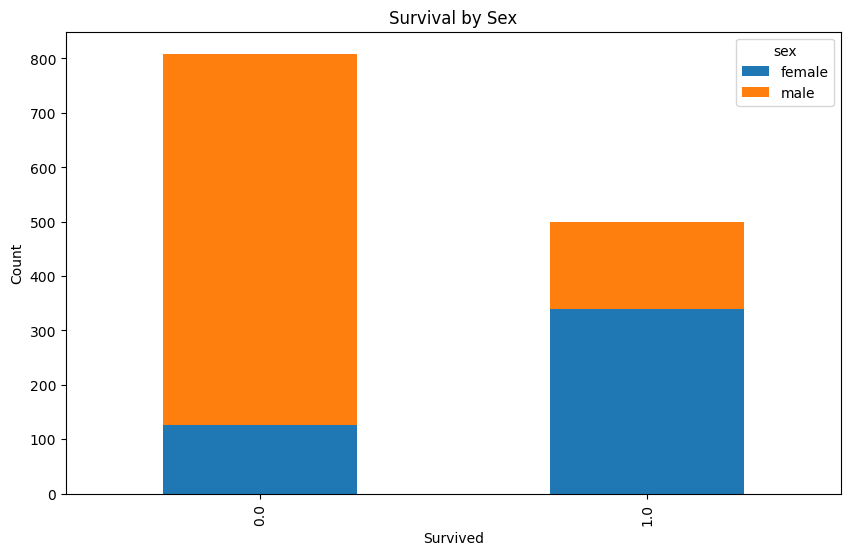

In [425]:
# plot the pivot table as a stacked bar chart
pivot.plot.bar(stacked=True, figsize=(10,6))

# add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Sex')

# show the plot
plt.show()

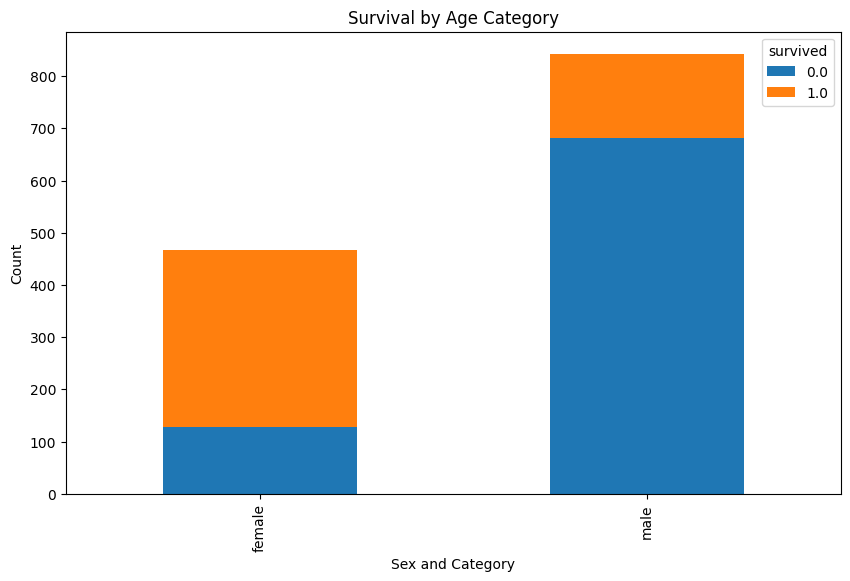

In [426]:
# transpose the pivot table to swap the axes
pivot4 = pivot.transpose()

# plot the pivot table as a stacked bar chart
pivot4.plot.bar(stacked=True, figsize=(10,6))

# add labels and title
plt.xlabel('Sex and Category')
plt.ylabel('Count')
plt.title('Survival by Age Category')

# show the plot
plt.show()

In [427]:
pivot2 = pd.pivot_table(concat_frames, index = 'survived', columns = 'category', 
                     values = 'sex' ,aggfunc ='count')

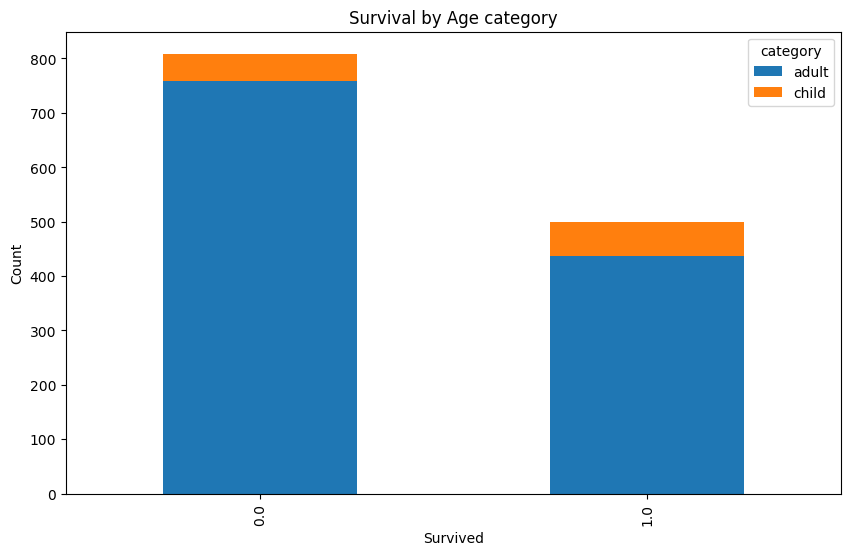

In [428]:
# plot the pivot table as a stacked bar chart
pivot2.plot.bar(stacked=True, figsize=(10,6))

# add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Age category')

# show the plot
plt.show()

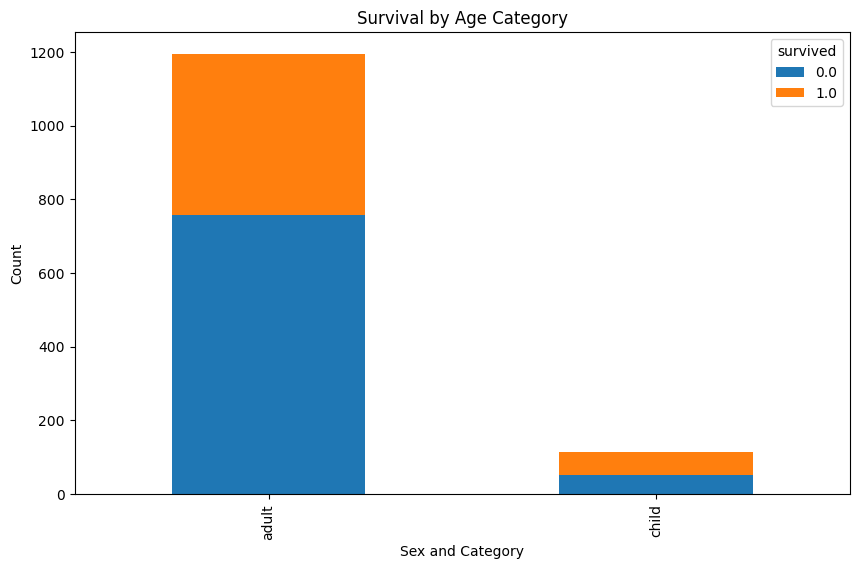

In [429]:
# transpose the pivot table to swap the axes
pivot3 = pivot2.transpose()

# plot the pivot table as a stacked bar chart
pivot3.plot.bar(stacked=True, figsize=(10,6))

# add labels and title
plt.xlabel('Sex and Category')
plt.ylabel('Count')
plt.title('Survival by Age Category')

# show the plot
plt.show()

In [430]:
from scipy import stats

In [431]:
# Import scipy.stats
from scipy import stats

# Convert survived column to boolean
concat_frames["survived"] = concat_frames["survived"] == 1

# Define the groups based on sex and category
female = concat_frames["sex"] == "female"
male = ~female
child = concat_frames["category"] == "child"
adult = ~child

# Perform the rank-sum test by sex
result_sex = stats.ranksums(concat_frames.loc[female, "survived"], concat_frames.loc[male, "survived"])
print(result_sex)

# Perform the rank-sum test by category
result_category = stats.ranksums(concat_frames.loc[child, "survived"], concat_frames.loc[adult, "survived"])
print(result_category)

# Perform the rank-sum test by sex and category
result_sex_category = stats.ranksums(concat_frames.loc[female & child, "survived"], concat_frames.loc[female & adult | male & child | male & adult, "survived"])
print(result_sex_category)

RanksumsResult(statistic=16.09117943989995, pvalue=2.9417933787537785e-58)
RanksumsResult(statistic=3.3933851045819727, pvalue=0.0006903451156704744)
RanksumsResult(statistic=3.2211083423451137, pvalue=0.0012769586506752777)


In [445]:
table = pd.crosstab(concat_frames["survived"], [concat_frames["sex"], concat_frames["category"]], margins=True, margins_name="Total", normalize="columns") 
print(table)

sex         female           male               Total
category     adult child    adult     child          
survived                                             
False     0.262019  0.36  0.83419  0.507692  0.618029
True      0.737981  0.64  0.16581  0.492308  0.381971


In [470]:
survival_rate = table.loc[1] 
sex = ["female", "male"] 
category = ["child", "adult"] 
print(survival_rate)

sex     category
female  adult       0.737981
        child       0.640000
male    adult       0.165810
        child       0.492308
Total               0.381971
Name: True, dtype: float64


<Figure size 1000x1000 with 0 Axes>

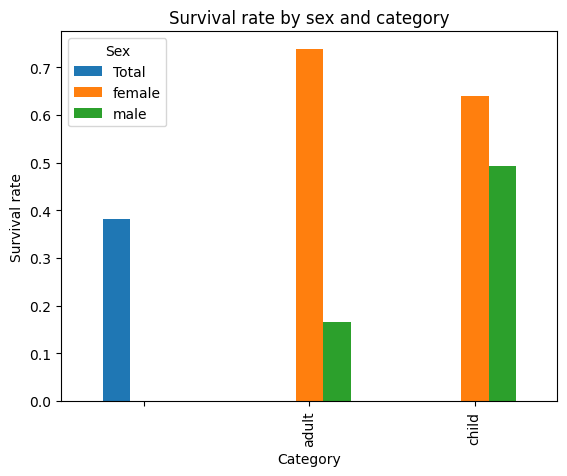

In [473]:
#Plot the bar plot with grouped bars
plt.figure(figsize=(10, 10)) 
survival_rate.unstack(level=0).plot(kind="bar") 
plt.xlabel("Category") 
plt.ylabel("Survival rate") 
plt.title("Survival rate by sex and category") 
plt.legend(title="Sex") 
plt.show()

In [432]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(concat_frames, test_size=0.2)
print (train.shape)
print(train)

(1047, 7)
     pclass  survived     sex   age  case_id  \
253       1      True  female  48.0      254   
233       1      True  female   NaN      234   
689       3     False    male  43.0      689   
17        1     False    male  71.0       18   
801       3     False    male  28.0      801   
..      ...       ...     ...   ...      ...   
146       1      True  female  15.0      147   
574       2      True  female   8.0      574   
337       2     False    male  27.0      338   
36        1      True  female  51.0       37   
632       3     False    male  33.0      632   

                                                  name category  
253    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)    adult  
233  Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...    adult  
689                                    Cook, Mr. Jacob    adult  
17                             Artagaveytia, Mr. Ramon    adult  
801                        Vanden Steen, Mr. Leo Peter    adult  
..               

In [433]:
test.drop('survived',
  axis='columns', inplace=True)
print (test.shape)
print(test)

(262, 6)
      pclass     sex   age  case_id  \
424        2    male  28.0      425   
1258       3    male  35.0     1258   
1161       3    male  28.0     1161   
1135       3    male  32.0     1135   
342        2    male  32.0      343   
...      ...     ...   ...      ...   
537        2    male  28.0      538   
995        3  female  18.0      995   
41         1  female  50.0       42   
422        2    male  28.0      423   
1230       3  female  26.0     1230   

                                                 name category  
424                     Banfield, Mr. Frederick James    adult  
1258                  Brocklebank, Mr. William Alfred    adult  
1161                   Vande Walle, Mr. Nestor Cyriel    adult  
1135                              Jussila, Mr. Eiriik    adult  
342                                Hickman, Mr. Lewis    adult  
...                                               ...      ...  
537                                 Harper, Rev. John    adult  
99

In [434]:
#Import the necessary modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

#Load the dataset
data = concat_frames

#Select the features and the target
X = data[["sex"]] 
y = data["survived"]

#Encode the categorical feature
X["sex"] = X["sex"].map({"male": 0, "female": 1})

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create and fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, criterion="gini") 
clf.fit(X_train, y_train)

#Make predictions on the test set
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred) 
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.79


In [435]:
#Select the features and the target
X = data[["category"]] 
y = data["survived"]

#Encode the categorical feature
X["category"] = X["category"].map({"child": 0, "adult": 1})

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create and fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, criterion="gini") 
clf.fit(X_train, y_train)

#Make predictions on the test set
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred) 
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.60


In [436]:
#Select the features and the target
X = data[["category","sex"]] 
y = data["survived"]

#Encode the categorical feature
X["category"] = X["category"].map({"child": 0, "adult": 1})
X["sex"] = X["sex"].map({"male": 0, "female": 1})

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create and fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, criterion="gini") 
clf.fit(X_train, y_train)

#Make predictions on the test set
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred) 
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.77


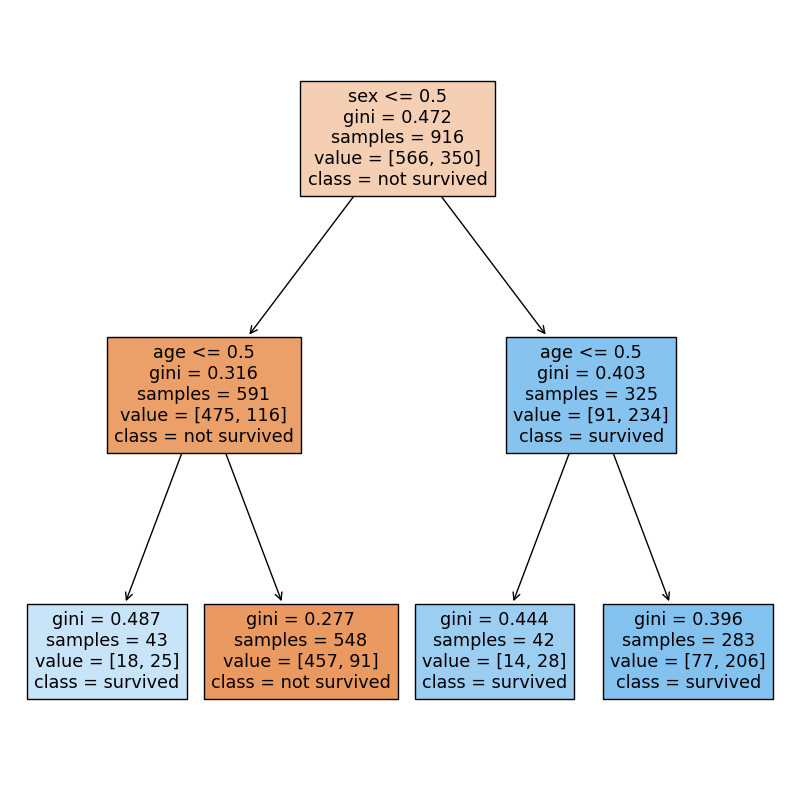

In [437]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10)) 
plot_tree(clf, feature_names=["age", "sex"], 
          class_names=["not survived", "survived"], 
          filled=True) 
plt.show()

In [438]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

#Create and fit the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean") 
knn.fit(X_train, y_train)

#Make predictions on the test set
y_pred = knn.predict(X_test)

#Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred) 
print(f"The accuracy of the k-nearest neighbors classifier is {acc:.2f}")

The accuracy of the k-nearest neighbors classifier is 0.77


/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


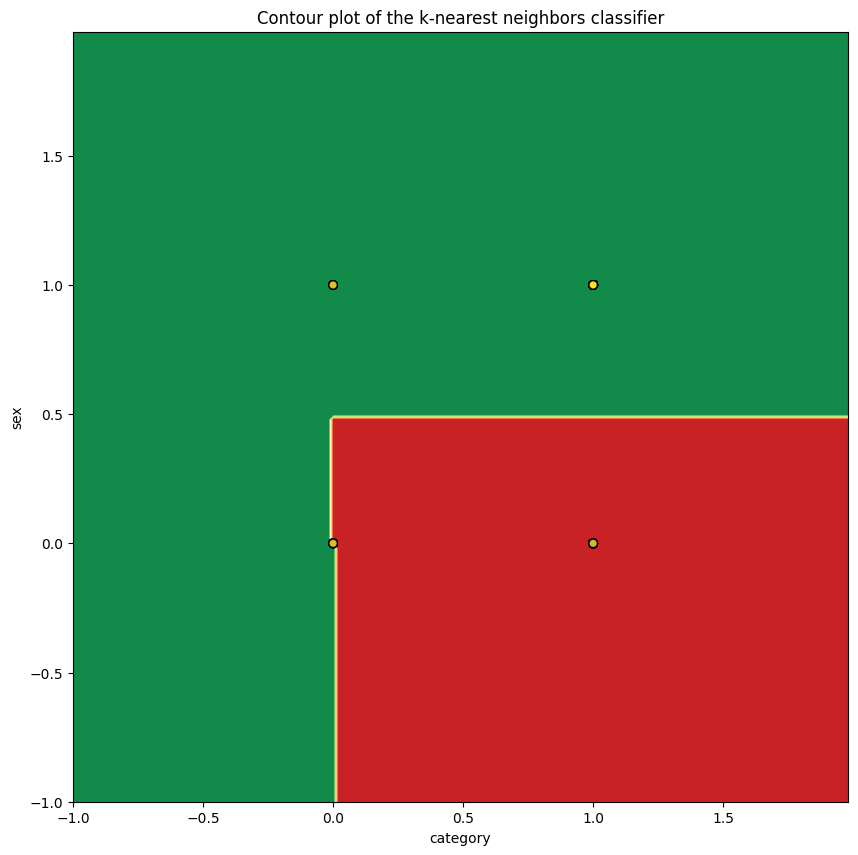

In [443]:
#Create a dataframe with the test data and the predictions
df = pd.DataFrame(X_test) 
df["survived"] = y_test 
df["predicted"] = y_pred

#Create a grid of points to plot
h = .02 # step size in the mesh 
x_min, x_max = X["category"].min() - 1, X["category"].max() + 1 
y_min, y_max = X["sex"].min() - 1, X["sex"].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Predict the class labels for the grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#Reshape the predictions to match the grid shape
Z = Z.reshape(xx.shape)

#Plot the contour plot with the test data points
plt.figure(figsize=(10, 10)) 
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn) 
plt.scatter(X_test["category"], X_test["sex"], c=y_test, edgecolors="black", alpha=0.8) 
plt.xlabel("category") 
plt.ylabel("sex") 
plt.title("Contour plot of the k-nearest neighbors classifier") 
plt.show()